### <center>Muhammad Rizki Assamsuli</center>
#### <center>F1D022146</center>

# Memperbaiki kualitas citra dari gambar

In [123]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

[[253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 ...
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]]


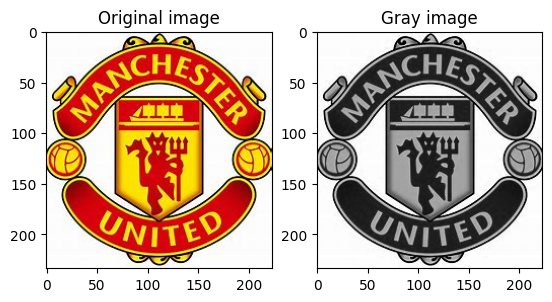

In [124]:
muOri = plt.imread('manchester_united.jpeg') 
plt.subplot(121)
plt.title("Original image")
plt.imshow(muOri) 
muGray = cv2.cvtColor(muOri, cv2.COLOR_BGR2GRAY) 
plt.subplot(122)
plt.title("Gray image")
plt.imshow(muGray, cmap='gray') 
print(muGray)

###  mean filtering

In [125]:
kernel_3 = np.full((3,3), 1/9)
kernel_9 = np.full((9,9), 1/81) 

In [126]:
def filter(image, kernel):
    heightImage, widthImage = image.shape 
    heightKernel, widthKernel = kernel.shape 
    heigthCenter = int((heightKernel - 1)/2) 
    widthCenter = int((widthKernel - 1)/2) 

    leftPad = widthCenter
    rightPad = widthKernel - widthCenter
    topPad = heigthCenter
    botPad = heightKernel - heigthCenter
    image = np.pad(image, ((leftPad, rightPad), (topPad, botPad)), mode='edge')

    result = np.zeros([heightImage, widthImage]) 
    # proses konvolusi
    for i in range(heightImage):
         for j in range(widthImage):
             helper = 0
             for k in range(heightKernel):
                 for l in range(widthKernel):
                     helper += image[i+k, j+l] * kernel[k, l]
             result[i, j] = helper 
    return result 

In [127]:
mean_3 = filter(muGray, kernel_3)
mean_9 = filter(muGray, kernel_9)

(-0.5, 222.5, 233.5, -0.5)

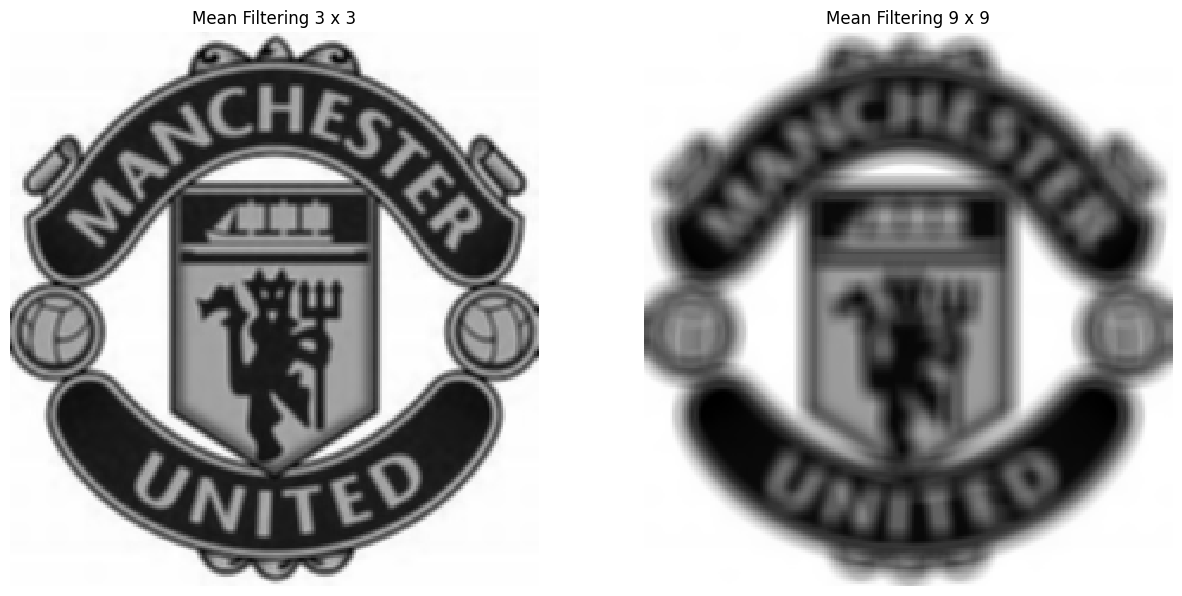

In [128]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].set_title('Mean Filtering 3 x 3')
ax[0].imshow(mean_3, cmap='gray', interpolation='nearest')
ax[0].axis('off')  # menyembunyikan sumbu
ax[1].set_title('Mean Filtering 9 x 9')
ax[1].imshow(mean_9, cmap='gray', interpolation='nearest')
ax[1].axis('off')  # menyembunyikan sumbu


###  Modus Filtering

In [129]:
def modus(arr):
    count = {}
    for num in arr:
        if num in count:
            count[num] += 1
        else:
            count[num] = 1
            
          
    max_count = 0
    modus = None
    for num, value in count.items():
        if value > max_count:
            max_count = value
            modus = num
    return modus 

In [130]:
def filtermd(image, kernel):
    heightImage, widthImage = image.shape
    heightKernel, widthKernel = kernel.shape 
    heigthCenter = int((heightKernel - 1)/2) 
    widthCenter = int((widthKernel - 1)/2) 

    leftPad = widthCenter
    rightPad = (widthKernel-1) - widthCenter
    topPad = heigthCenter
    botPad = (heightKernel-1) - heigthCenter
    image = np.pad(image, ((leftPad, rightPad), (topPad, botPad)), mode='edge')

    result = np.zeros([heightImage, widthImage]) 
    for i in range(heightImage):
         for j in range(widthImage):
             temp = np.zeros(len(kernel)*len(kernel))
             indeks = 0
             for k in range(heightKernel):
                 for l in range(widthKernel):
                     temp[indeks] += image[i+k,j+l]
                     indeks+=1
                     result[i,j] = modus(temp)
             
    return result 

In [131]:
modus_3 = filtermd(muGray, kernel_3)
modus_9 = filtermd(muGray, kernel_9)

(-0.5, 222.5, 233.5, -0.5)

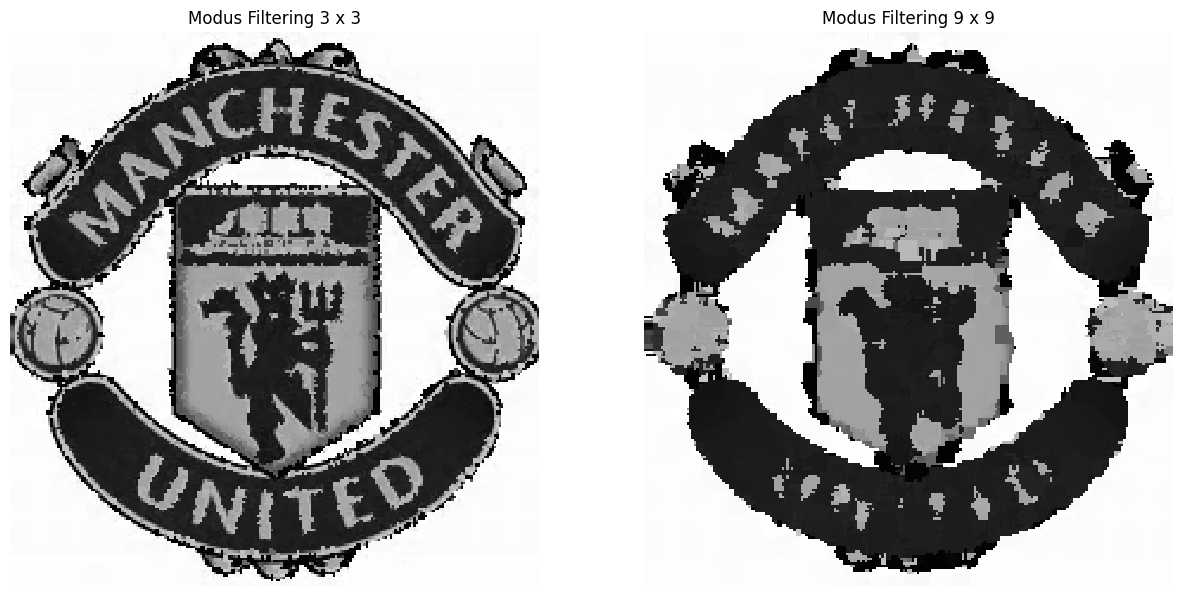

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].set_title('Modus Filtering 3 x 3')
ax[0].imshow(modus_3, cmap='gray', interpolation='nearest')
ax[0].axis('off')  # menyembunyikan sumbu
ax[1].set_title('Modus Filtering 9 x 9')
ax[1].imshow(modus_9, cmap='gray', interpolation='nearest')
ax[1].axis('off')  # menyembunyikan sumbu


###  Median Filtering 

In [133]:
def median(arr):
    n = len(arr) 
    sorted_arr = sorted(arr)
    if n % 2 == 0:
        median1 = sorted_arr[n//2]
        median2 = sorted_arr[n//2 - 1]
        median = (median1 + median2)/2
    else:
        median = sorted_arr[n//2]
    return median 

In [134]:
def filterm(image, kernel):
    heightImage, widthImage = image.shape
    heightKernel, widthKernel = kernel.shape
    heigthCenter = int((heightKernel - 1)/2)
    widthCenter = int((widthKernel - 1)/2)

    leftPad = widthCenter
    rightPad = widthKernel - widthCenter
    topPad = heigthCenter
    botPad = heightKernel - heigthCenter
    image = np.pad(image, ((leftPad, rightPad), (topPad, botPad)), mode='edge')

    result = np.zeros([heightImage, widthImage])
    for i in range(heightImage):
         for j in range(widthImage):
             temp = np.zeros(len(kernel)*len(kernel))
             indeks = 0
             for k in range(heightKernel):
                 for l in range(widthKernel):
                     temp[indeks] += image[i+k,j+l]
                     indeks+=1
                     result[i,j] = median(temp)
             
    return result

In [135]:
median_3 = filterm(muGray, kernel_3)
median_9 = filterm(muGray, kernel_9)

(-0.5, 222.5, 233.5, -0.5)

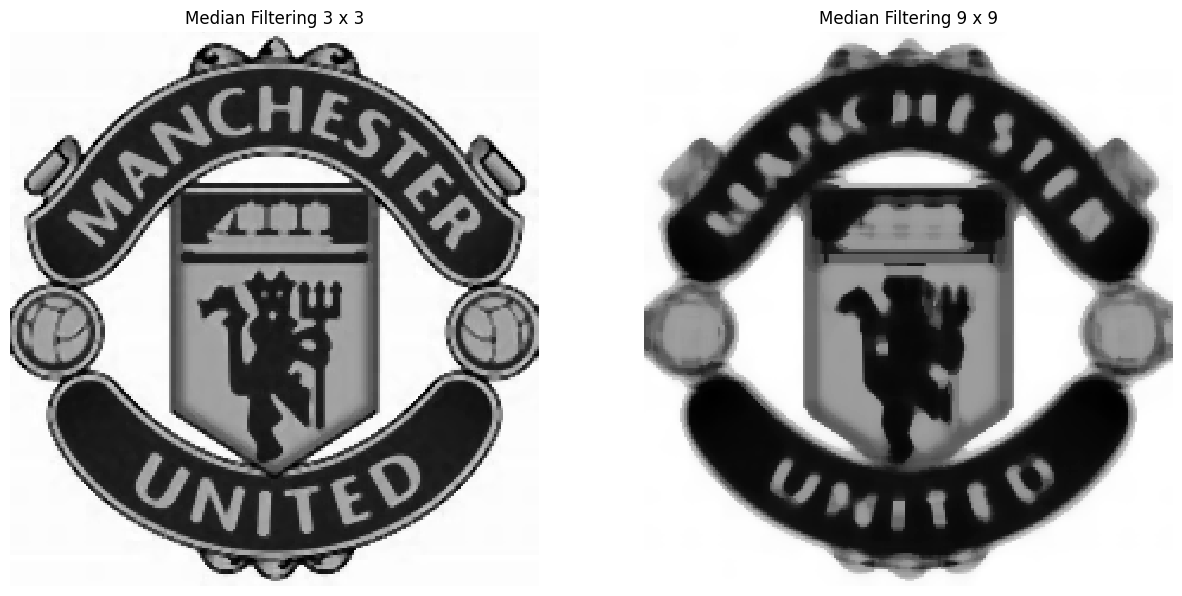

In [136]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].set_title('Median Filtering 3 x 3')
ax[0].imshow(median_3, cmap='gray', interpolation='nearest')
ax[0].axis('off')  # menyembunyikan sumbu
ax[1].set_title('Median Filtering 9 x 9')
ax[1].imshow(median_9, cmap='gray', interpolation='nearest')
ax[1].axis('off')  # menyembunyikan sumbu


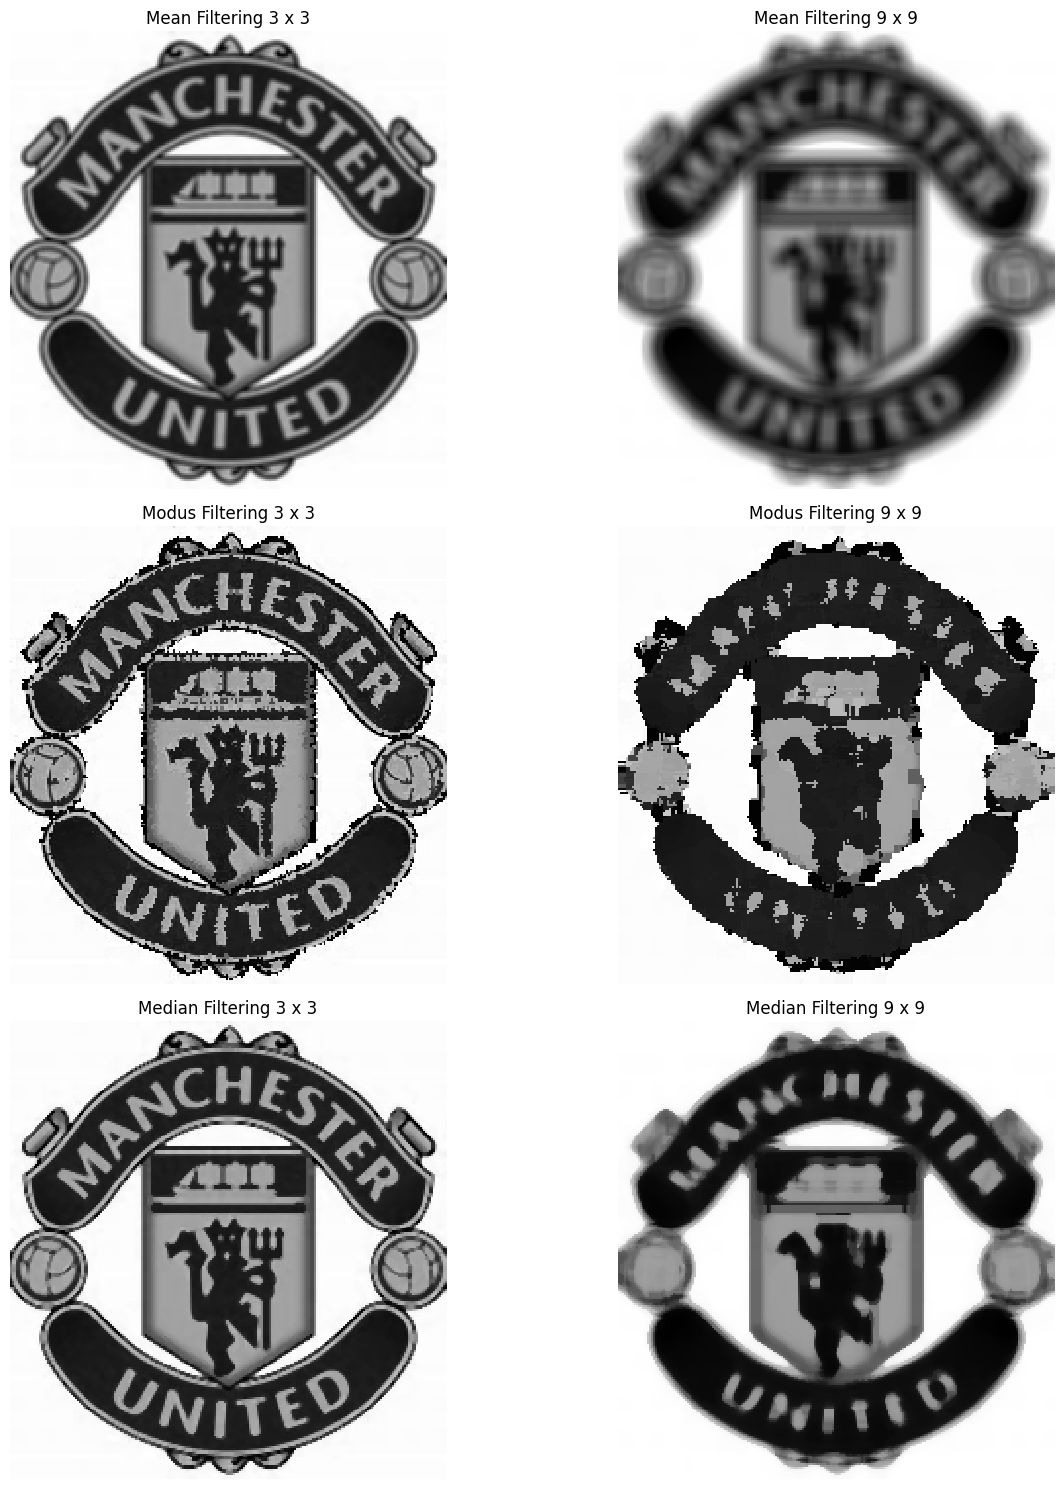

In [152]:
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Plot Mean Filtering
axes[0, 0].set_title('Mean Filtering 3 x 3')
axes[0, 0].imshow(mean_3, cmap='gray', interpolation='nearest')
axes[0, 0].axis('off')

axes[0, 1].set_title('Mean Filtering 9 x 9')
axes[0, 1].imshow(mean_9, cmap='gray', interpolation='nearest')
axes[0, 1].axis('off')

# Plot Modus Filtering
axes[1, 0].set_title('Modus Filtering 3 x 3')
axes[1, 0].imshow(modus_3, cmap='gray', interpolation='nearest')
axes[1, 0].axis('off')

axes[1, 1].set_title('Modus Filtering 9 x 9')
axes[1, 1].imshow(modus_9, cmap='gray', interpolation='nearest')
axes[1, 1].axis('off')

# Plot Median Filtering
axes[2, 0].set_title('Median Filtering 3 x 3')
axes[2, 0].imshow(median_3, cmap='gray', interpolation='nearest')
axes[2, 0].axis('off')

axes[2, 1].set_title('Median Filtering 9 x 9')
axes[2, 1].imshow(median_9, cmap='gray', interpolation='nearest')
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()
